# PROBETESTAT - Aufgabe 3

## Polynomial Interpolation

### Author: [@O-Manoli](https://github.com/o-manoli)

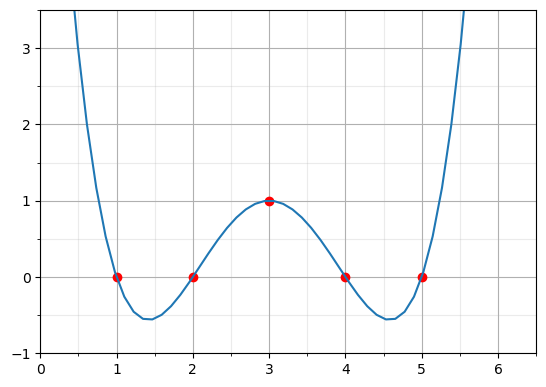

In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Points
## Written as PX, PY #axis-array

PX = np.arange(1, 6)   # start, stop, step -> count form [1 ,6) with a step of 1
PY = np.array([0, 0, 1, 0, 0])  # just convert what you got to numpy.ndarray

## or as Points -> Axis
### Points = lambda *P: np.array(P).T   # e. g. Points([0, 0], [1, 1])

# Polynomial Sequence

polyS = lambda X: np.array([X**n for n in range(len(PX))]).T  # where X is a 1D array
## Expected
### when X is a 1D vec ->
####   # Matrix with the rows of [xn^0, xn^1, xn^2 ...] # horizontal expansion
####       # where xn the corresponding element from X
## Default behaviour is downward expansion
###   => therefore `.T` is needed or `.transpose()`

# Alternative / Better way ## import functools! #Vandermonde-Matrix
## polyS = functools.partial(np.vander, N = len(PX))     # polynomial sequence matrix

# Polynomial Coefficient

C = np.linalg.solve(polyS(PX), PY)

P = lambda x: polyS(x) @ C
## A . C = b is permitted for any number of rows in A = polyS(PX)
###   as long as the number of columns in A is equal to number of elements in C
###   C is 1D vector! It's not really the same as a matrix with one column/row!
## Alternative
### P = numpy..poly1d(CoefficientsVector)  # leading with `cn x^n`

# Plotting

X = np.linspace(0, 6)       # X-Axis
## linspace -> `n` equally distributed values within the interval [a, b]
###   # defaults n = 100

for x, y in zip(PX, PY):    ## just a `plt.plot(PX, PY, 'ro')` :)
#     # [fmt] is str to define style of marker and the color
#     ##   # marker style '.':point, 'o':circle ...
#     ##   # color 'b':blue, 'k':black, 'r':red
#     # https://matplotlib.org/stable/api/markers_api.html
    plt.plot(x, y, 'ro')        # mark a point (x, y) with a red circle
## Alternative
# plt.scatter(PX, PY, color='red')


## get current axis
## set ylim, ylim of that axis
ax = plt.gca()
YLim = -1, 3
XLim =  0, 6
ax.set(ylim=YLim, xlim=XLim)

## numpy.arange -> [start, stop) with h=1 step
YTicks = np.arange(YLim[0], YLim[1]+1, 1/2) # [-1, 3] = [-1, 3+h) including upper bound
XTicks = np.arange(XLim[0], XLim[1]+1, 1/2)

plt.grid(True)   # grid lines
ax.set_xticks(XTicks[::2])
ax.set_xticks(XTicks[1::2], minor=True) # alpha is set to 0 on minor #defaults
ax.set_yticks(YTicks[::2])
ax.set_yticks(YTicks[1::2], minor=True)
ax.grid(which='minor', alpha=0.25)       # show minor grid lines

ax.set_aspect('equal')

plt.plot(X, P(X));      # ;suppress output